# Praca domowa 11

### Cutting stock problem

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import pickle

In [ ]:
from GeneticAlgorithms.cutting_stock_problem import *

#### $R=800$

In [ ]:
rectangles800 = rectangles_from_file('./data/cutting/r800.csv')

In [ ]:
stripes800 = stripe_generator(rectangles800, 2 * 800)

In [ ]:
population800 = CirclePopulation(800, stripes800, n=500)
population800.generate(time_limit=1/4)

In [ ]:
print(f"Current best solution: {max([p.val_evaluate() for p in population800.population])}")

Current best solution: 22380.0


In [ ]:
history800 = population800.train(n_epochs=30,
                                 crossover_population_ratio=0.8, stripe_ratio_to_cut=0.1,
                                 mutation_population_ratio=0.3, rectangles_limit=5, time_limit=1/4,
                                 k=7,
                                 eval_frequency=1, eval_score_finish=None, history=True
)

Epoch: 1/30
Best solution function value: 21840.0
Epoch: 2/30
Best solution function value: 26140.0
Epoch: 3/30
Best solution function value: 27100.0
Epoch: 4/30
Best solution function value: 30840.0
Epoch: 5/30
Best solution function value: 34500.0
Epoch: 6/30
Best solution function value: 35240.0
Epoch: 7/30
Best solution function value: 35640.0
Epoch: 8/30
Best solution function value: 38240.0
Epoch: 9/30
Best solution function value: 38640.0
Epoch: 10/30
Best solution function value: 38800.0
Epoch: 11/30
Best solution function value: 39600.0
Epoch: 12/30
Best solution function value: 40240.0
Epoch: 13/30
Best solution function value: 40800.0
Epoch: 14/30
Best solution function value: 40900.0
Epoch: 15/30
Best solution function value: 42100.0
Epoch: 16/30
Best solution function value: 42600.0
Epoch: 17/30
Best solution function value: 43240.0
Epoch: 18/30
Best solution function value: 44440.0
Epoch: 19/30
Best solution function value: 44840.0
Epoch: 20/30
Best solution function valu

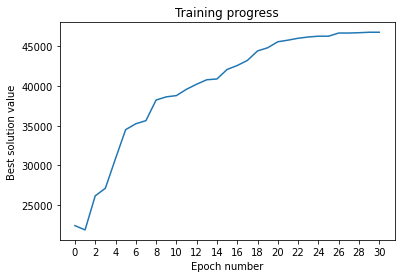

In [ ]:
sns.lineplot(x=list(range(len(history800))), y=history800)
plt.title('Training progress')
plt.xlabel('Epoch number')
plt.xticks(list(range(0, len(history800), 2)))
plt.ylabel('Best solution value')
plt.show()

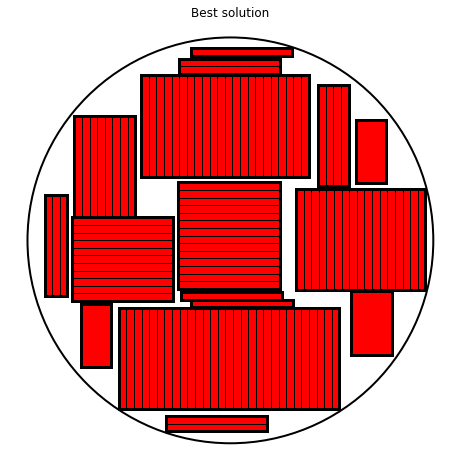

In [ ]:
best800_index = np.argmax([p.val_evaluate() for p in population800.population])
population800.population[best800_index].plot()
plt.title('Best solution')
plt.show()

#### $R=1200$

In [ ]:
rectangles1200 = rectangles_from_file('./data/cutting/r1200.csv')

In [ ]:
stripes1200 = stripe_generator(rectangles1200, 2 * 1200)

In [ ]:
len(stripes1200)

903218

Algorytm wygenerował ponad 900000 różnych pasków - jest to trochę za dużo ze względu na ograniczenia wydajnościowe.

Spróbuję rozwiązać to zadanie szybciej korzystając z pasków o mniejszym maksmalnym wymiarze.

In [ ]:
rectangles1200 = rectangles_from_file('./data/cutting/r1200.csv')

In [ ]:
stripes1200_small = stripe_generator(rectangles1200, 2 * 1200 / 2)

In [ ]:
population1200_small = CirclePopulation(1200, stripes1200_small, n=500)
population1200_small.generate(time_limit=1/4)

In [ ]:
print(f"Current best solution: {max([p.val_evaluate() for p in population1200_small.population])}")

Current best solution: 20500.0


In [ ]:
history1200_small = population1200_small.train(n_epochs=50,
                                               crossover_population_ratio=0.8, stripe_ratio_to_cut=0.2,
                                               mutation_population_ratio=0.3, rectangles_limit=5, time_limit=1/4,
                                               k=8,
                                               eval_frequency=2, eval_score_finish=30000, history=True
)

Epoch: 2/50
Best solution function value: 20440.0
Epoch: 4/50
Best solution function value: 22140.0
Epoch: 6/50
Best solution function value: 22300.0
Epoch: 8/50
Best solution function value: 22880.0
Epoch: 10/50
Best solution function value: 23180.0
Epoch: 12/50
Best solution function value: 23900.0
Epoch: 14/50
Best solution function value: 24140.0
Epoch: 16/50
Best solution function value: 24720.0
Epoch: 18/50
Best solution function value: 25640.0
Epoch: 20/50
Best solution function value: 26280.0
Epoch: 22/50
Best solution function value: 26660.0
Epoch: 24/50
Best solution function value: 26820.0
Epoch: 26/50
Best solution function value: 27020.0
Epoch: 28/50
Best solution function value: 27100.0
Epoch: 30/50
Best solution function value: 27180.0
Epoch: 32/50
Best solution function value: 27220.0
Epoch: 34/50
Best solution function value: 27220.0
Epoch: 36/50
Best solution function value: 27260.0
Epoch: 38/50
Best solution function value: 27420.0
Epoch: 40/50
Best solution function

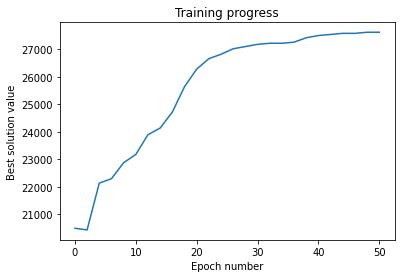

In [ ]:
sns.lineplot(x=list(range(0, len(history1200_small) * 2, 2)), y=history1200_small)
plt.title('Training progress')
plt.xlabel('Epoch number')
plt.ylabel('Best solution value')
plt.show()

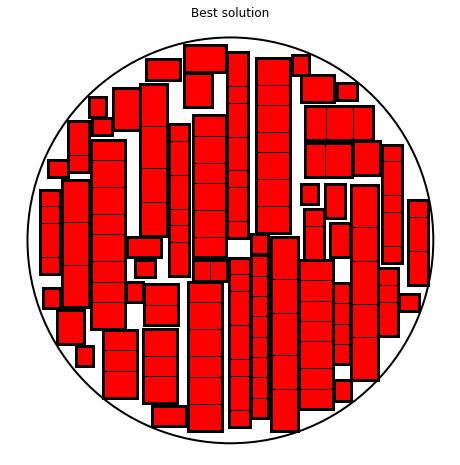

In [ ]:
best1200_small_index = np.argmax([p.val_evaluate() for p in population1200_small.population])
population1200_small.population[best1200_small_index].plot()
plt.title('Best solution')
plt.show()

Pomimo 50 epok, algorytmowi nie udało się usiągnać oczekiwanego wyniku. Spróbuję pozwolić algorytmowi działać jeszcze przez kolejne epoki, ze zmienionymi parametrami.

In [ ]:
history1200_small_2 = population1200_small.train(n_epochs=50,
                                                 crossover_population_ratio=0.85, stripe_ratio_to_cut=0.35,
                                                 mutation_population_ratio=0.4, rectangles_limit=5, time_limit=1/3,
                                                 k=8,
                                                 eval_frequency=2, eval_score_finish=30000, history=True
)

Epoch: 2/50
Best solution function value: 27700.0
Epoch: 4/50
Best solution function value: 27740.0
Epoch: 6/50
Best solution function value: 27820.0
Epoch: 8/50
Best solution function value: 27960.0
Epoch: 10/50
Best solution function value: 28000.0
Epoch: 12/50
Best solution function value: 28540.0
Epoch: 14/50
Best solution function value: 28820.0
Epoch: 16/50
Best solution function value: 29000.0
Epoch: 18/50
Best solution function value: 29160.0
Epoch: 20/50
Best solution function value: 29200.0
Epoch: 22/50
Best solution function value: 29200.0
Epoch: 24/50
Best solution function value: 29240.0
Epoch: 26/50
Best solution function value: 29480.0
Epoch: 28/50
Best solution function value: 29520.0
Epoch: 30/50
Best solution function value: 29520.0
Epoch: 32/50
Best solution function value: 29520.0
Epoch: 34/50
Best solution function value: 29520.0


KeyboardInterrupt: 

Uczenie zatrzymane ze względu na brak postępów - nastąpi kolejna zmiana parametrów.

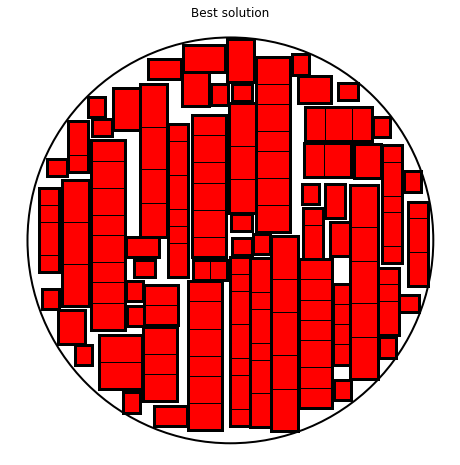

In [ ]:
best1200_small_index = np.argmax([p.val_evaluate() for p in population1200_small.population])
population1200_small.population[best1200_small_index].plot()
plt.title('Best solution')
plt.show()

In [ ]:
history1200_small_3 = population1200_small.train(n_epochs=50,
                                                 crossover_population_ratio=0.9, stripe_ratio_to_cut=0.4,
                                                 mutation_population_ratio=0.5, rectangles_limit=5, time_limit=1/3,
                                                 k=8,
                                                 eval_frequency=2, eval_score_finish=30000, history=True
)

Epoch: 2/50
Best solution function value: 29520.0
Epoch: 4/50
Best solution function value: 29520.0
Epoch: 6/50
Best solution function value: 29520.0


KeyboardInterrupt: 

Uczenie wciąż nie przynosi rezultatów, algorytm zatrzymał się na tym jednym wyniku. Niemniej jednak, uzyskana wartość $29520$ jest bliska oczekiwanemu $30000$.

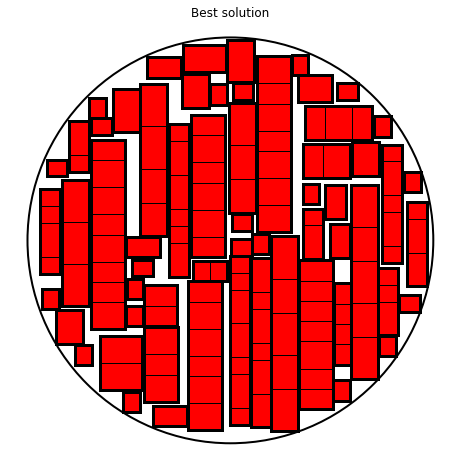

In [ ]:
best1200_small_index = np.argmax([p.val_evaluate() for p in population1200_small.population])
population1200_small.population[best1200_small_index].plot()
plt.title('Best solution')
plt.show()

#### $R=1000$

In [ ]:
rectangles1000 = rectangles_from_file('./data/cutting/r1000.csv')

In [ ]:
stripes1000 = stripe_generator(rectangles1000, 2 * 1000)

In [ ]:
population1000 = CirclePopulation(1000, stripes1000, n=500)
population1000.generate(time_limit=1/4)

In [ ]:
print(f"Current best solution: {max([p.val_evaluate() for p in population1000.population])}")

Current best solution: 16220.0


In [ ]:
history1000 = population1000.train(n_epochs=50,
                                   crossover_population_ratio=0.8, stripe_ratio_to_cut=0.1,
                                   mutation_population_ratio=0.3, rectangles_limit=5, time_limit=1/4,
                                   k=7,
                                   eval_frequency=1, eval_score_finish=17500, history=True
)

Epoch: 1/50
Best solution function value: 15780.0
Epoch: 2/50
Best solution function value: 15880.0
Epoch: 3/50
Best solution function value: 16520.0
Epoch: 4/50
Best solution function value: 16860.0
Epoch: 5/50
Best solution function value: 16860.0
Epoch: 6/50
Best solution function value: 17240.0
Epoch: 7/50
Best solution function value: 17440.0
Epoch: 8/50
Best solution function value: 17440.0
Epoch: 9/50
Best solution function value: 18340.0


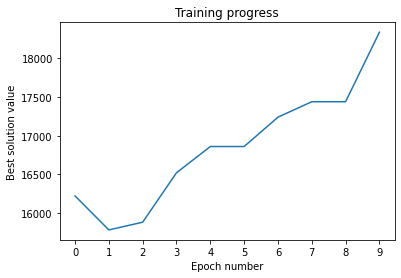

In [ ]:
sns.lineplot(x=list(range(len(history1000))), y=history1000)
plt.title('Training progress')
plt.xlabel('Epoch number')
plt.xticks(list(range(len(history1000))))
plt.ylabel('Best solution value')
plt.show()

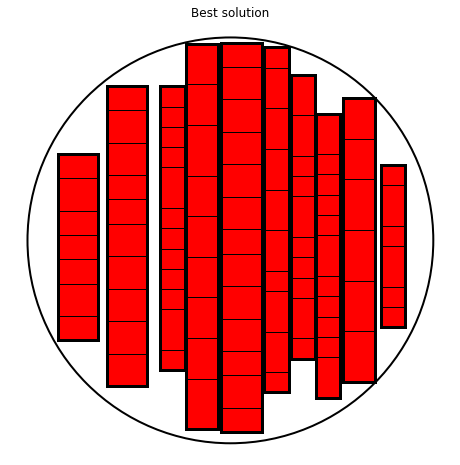

In [ ]:
best1000_index = np.argmax([p.val_evaluate() for p in population1000.population])
population1000.population[best1000_index].plot()
plt.title('Best solution')
plt.show()

Oczekiwany wynik został osiągnięty, jednak zobaczę, o ile jeszcze można polepszyć wynik w kilku następnych epockach.

In [ ]:
with open(r"history1000.pickle", "rb") as f:
    history1000 = pickle.load(f)

with open(r"population1000-trained.pickle", "rb") as f:
    population1000 = pickle.load(f)

In [ ]:
history1000_2 = population1000.train(n_epochs=10,
                                     crossover_population_ratio=0.8, stripe_ratio_to_cut=0.1,
                                     mutation_population_ratio=0.3, rectangles_limit=5, time_limit=1/4,
                                     k=7,
                                     eval_frequency=1, eval_score_finish=None, history=True
)

Epoch: 1/10
Best solution function value: 18380.0
Epoch: 2/10
Best solution function value: 19060.0
Epoch: 3/10
Best solution function value: 19100.0
Epoch: 4/10
Best solution function value: 19380.0
Epoch: 5/10
Best solution function value: 19420.0
Epoch: 6/10
Best solution function value: 19620.0
Epoch: 7/10
Best solution function value: 19840.0
Epoch: 8/10
Best solution function value: 19880.0
Epoch: 9/10
Best solution function value: 19920.0
Epoch: 10/10
Best solution function value: 19960.0


In [ ]:
history1000_concat = history1000 + history1000_2
history1000_concat.pop(len(history1000) - 1)

18340.0

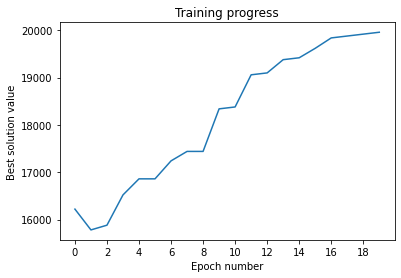

In [ ]:
sns.lineplot(x=list(range(len(history1000_concat))), y=history1000_concat)
plt.title('Training progress')
plt.xlabel('Epoch number')
plt.xticks(list(range(0, len(history1000_concat), 2)))
plt.ylabel('Best solution value')
plt.show()

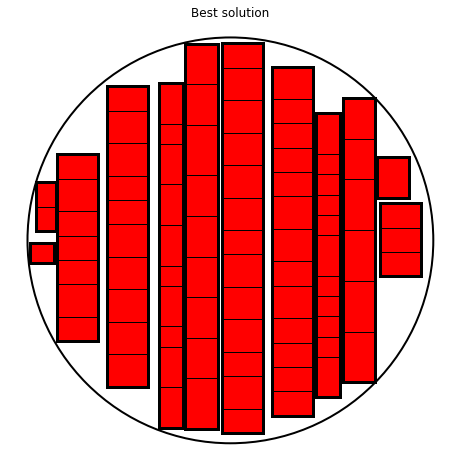

In [ ]:
best1000_2_index = np.argmax([p.val_evaluate() for p in population1000.population])
population1000.population[best1000_2_index].plot()
plt.title('Best solution')
plt.show()

#### $R=1100$

In [ ]:
rectangles1100 = rectangles_from_file('./data/cutting/r1100.csv')

In [ ]:
stripes1100 = stripe_generator(rectangles1100, 2 * 1100)

In [ ]:
population1100 = CirclePopulation(1100, stripes1100, n=500)
population1100.generate(time_limit=1/4)

In [ ]:
print(f"Current best solution: {max([p.val_evaluate() for p in population1100.population])}")

Current best solution: 22500.0


In [ ]:
history1100 = population1100.train(n_epochs=50,
                                   crossover_population_ratio=0.8, stripe_ratio_to_cut=0.1,
                                   mutation_population_ratio=0.3, rectangles_limit=5, time_limit=1/4,
                                   k=7,
                                   eval_frequency=1, eval_score_finish=25000, history=True
)

Epoch: 1/50
Best solution function value: 22500.0
Epoch: 2/50
Best solution function value: 23920.0
Epoch: 3/50
Best solution function value: 25800.0


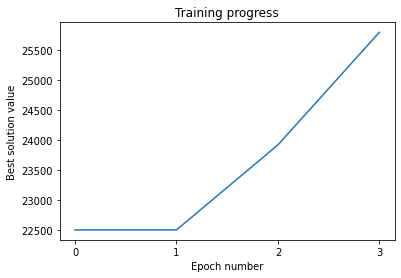

In [ ]:
sns.lineplot(x=list(range(len(history1100))), y=history1100)
plt.title('Training progress')
plt.xlabel('Epoch number')
plt.xticks(list(range(len(history1100))))
plt.ylabel('Best solution value')
plt.show()

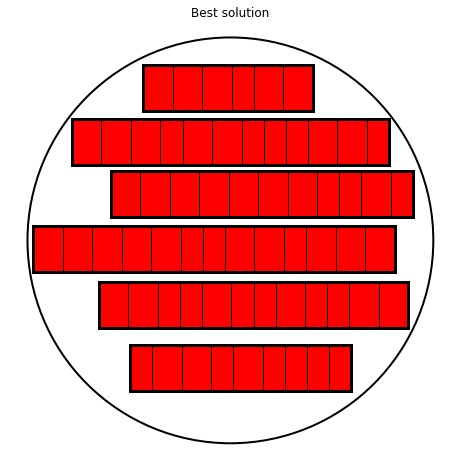

In [ ]:
best1100_index = np.argmax([p.val_evaluate() for p in population1100.population])
population1100.population[best1100_index].plot()
plt.title('Best solution')
plt.show()

Oczekiwany wynik został osiągnięty, jednak zobaczę, o ile jeszcze można polepszyć wynik w kilku następnych epockach.

In [ ]:
history1100_2 = population1100.train(n_epochs=10,
                                     crossover_population_ratio=0.8, stripe_ratio_to_cut=0.1,
                                     mutation_population_ratio=0.3, rectangles_limit=5, time_limit=1/4,
                                     k=7,
                                     eval_frequency=1, eval_score_finish=None, history=True
)

Epoch: 1/10
Best solution function value: 27020.0
Epoch: 2/10
Best solution function value: 27600.0
Epoch: 3/10
Best solution function value: 28200.0
Epoch: 4/10
Best solution function value: 29800.0
Epoch: 5/10
Best solution function value: 30400.0
Epoch: 6/10
Best solution function value: 30900.0
Epoch: 7/10
Best solution function value: 30900.0
Epoch: 8/10
Best solution function value: 30900.0
Epoch: 9/10
Best solution function value: 30900.0
Epoch: 10/10
Best solution function value: 30900.0


In [ ]:
history1100_concat = history1100 + history1100_2
history1100_concat.pop(len(history1100) - 1)

25800.0

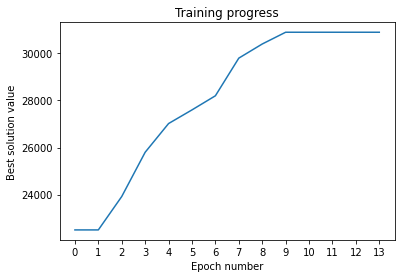

In [ ]:
sns.lineplot(x=list(range(len(history1100_concat))), y=history1100_concat)
plt.title('Training progress')
plt.xlabel('Epoch number')
plt.xticks(list(range(len(history1100_concat))))
plt.ylabel('Best solution value')
plt.show()

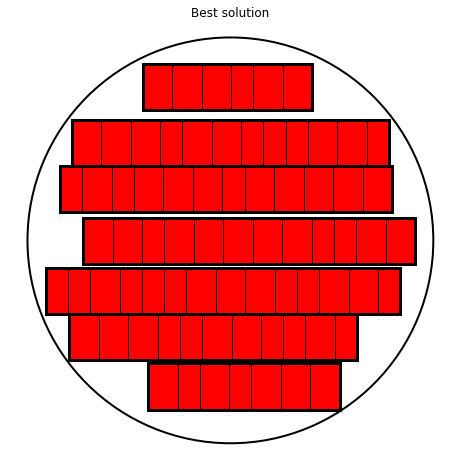

In [ ]:
best1100_2_index = np.argmax([p.val_evaluate() for p in population1100.population])
population1100.population[best1100_2_index].plot()
plt.title('Best solution')
plt.show()

#### $R=850$

In [ ]:
rectangles850 = rectangles_from_file('./data/cutting/r850.csv')

Ze względów wydajnościowych maksymalny rozmiar pasków jest mniejszy.

In [ ]:
stripes850 = stripe_generator(rectangles850, 2 * 850 / 4)

In [ ]:
population850 = CirclePopulation(850, stripes850, n=500)
population850.generate(time_limit=1/4)

In [ ]:
print(f"Current best solution: {max([p.val_evaluate() for p in population850.population])}")

Current best solution: 141200.0


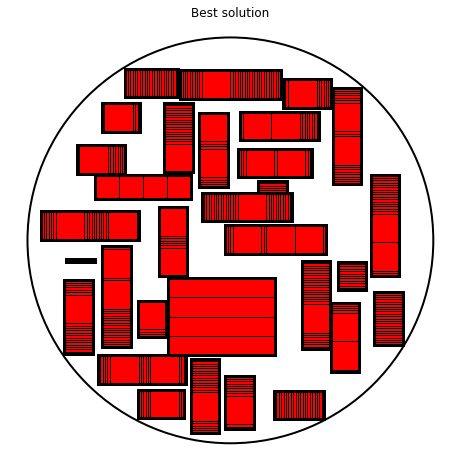

In [ ]:
best850_index = np.argmax([p.val_evaluate() for p in population850.population])
population850.population[best850_index].plot()
plt.title('Best solution')
plt.show()

Ponieważ dla tego zadania nie ma określonych limitów, ustawiam limit na 30 epok i brak limitu wartości funkcji, przy której kończy się trening.

In [ ]:
history850 = population850.train(n_epochs=30,
                                 crossover_population_ratio=0.8, stripe_ratio_to_cut=0.1,
                                 mutation_population_ratio=0.3, rectangles_limit=5, time_limit=1/4,
                                 k=7,
                                 eval_frequency=1, eval_score_finish=None, history=True
)

Epoch: 1/30
Best solution function value: 138110.0
Epoch: 2/30
Best solution function value: 149300.0
Epoch: 3/30
Best solution function value: 149300.0
Epoch: 4/30
Best solution function value: 164150.0
Epoch: 5/30
Best solution function value: 166250.0
Epoch: 6/30
Best solution function value: 168800.0
Epoch: 7/30
Best solution function value: 176120.0
Epoch: 8/30
Best solution function value: 178760.0
Epoch: 9/30
Best solution function value: 180470.0
Epoch: 10/30
Best solution function value: 181190.0
Epoch: 11/30
Best solution function value: 181490.0
Epoch: 12/30
Best solution function value: 183920.0
Epoch: 13/30
Best solution function value: 185540.0
Epoch: 14/30
Best solution function value: 186110.0
Epoch: 15/30
Best solution function value: 187670.0
Epoch: 16/30
Best solution function value: 190220.0
Epoch: 17/30
Best solution function value: 193430.0
Epoch: 18/30
Best solution function value: 194060.0
Epoch: 19/30
Best solution function value: 194360.0
Epoch: 20/30
Best sol

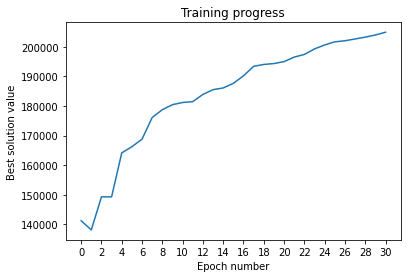

In [ ]:
sns.lineplot(x=list(range(len(history850))), y=history850)
plt.title('Training progress')
plt.xlabel('Epoch number')
plt.xticks(list(range(0, len(history850), 2)))
plt.ylabel('Best solution value')
plt.show()

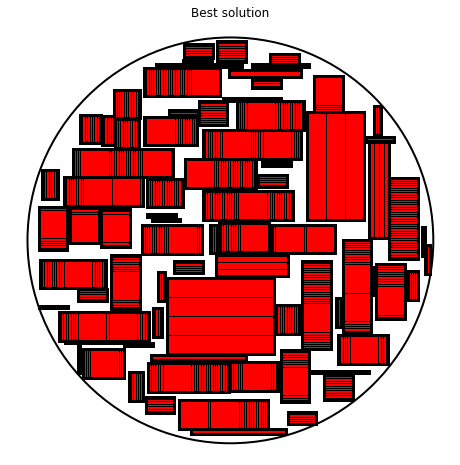

In [ ]:
best850_index = np.argmax([p.val_evaluate() for p in population850.population])
population850.population[best850_index].plot()
plt.title('Best solution')
plt.show()